In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "ipba-17-regression-gemstone-non-graded"

#UPLODED DATA


In [2]:
dimond_data=read.csv('/kaggle/input/ipba-17-regression-gemstone-non-graded/train.csv')

#Check Descriptive Statistics


In [3]:
summary(dimond_data)


       id             carat            cut               color          
 Min.   :     0   Min.   :0.2000   Length:193573      Length:193573     
 1st Qu.: 48393   1st Qu.:0.4000   Class :character   Class :character  
 Median : 96786   Median :0.7000   Mode  :character   Mode  :character  
 Mean   : 96786   Mean   :0.7907                                        
 3rd Qu.:145179   3rd Qu.:1.0300                                        
 Max.   :193572   Max.   :3.5000                                        
   clarity              depth           table             x        
 Length:193573      Min.   :52.10   Min.   :49.00   Min.   :0.000  
 Class :character   1st Qu.:61.30   1st Qu.:56.00   1st Qu.:4.700  
 Mode  :character   Median :61.90   Median :57.00   Median :5.700  
                    Mean   :61.82   Mean   :57.23   Mean   :5.715  
                    3rd Qu.:62.40   3rd Qu.:58.00   3rd Qu.:6.510  
                    Max.   :71.60   Max.   :79.00   Max.   :9.650  
       y     

#MISSING VALUES

In [4]:
missing_count <- sum(is.na(dimond_data))



In [5]:
print(missing_count)


[1] 0


In [6]:
dimond_data$color = factor(dimond_data$color,levels = c('D','E','F','G','H','I','J'),labels = c(7,6,5,4,3,2,1))
dimond_data$cut = factor(dimond_data$cut,levels = c('Fair','Good','Very Good','Premium','Ideal'),labels = c(1,2,3,4,5))
dimond_data$clarity = factor(dimond_data$clarity,levels = c('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),labels = c(1,2,3,4,5,6,7,8))

In [7]:
summary(dimond_data)


       id             carat        cut       color        clarity     
 Min.   :     0   Min.   :0.2000   1: 2021   7:24286   3      :53272  
 1st Qu.: 48393   1st Qu.:0.4000   2:11622   6:35869   4      :48027  
 Median : 96786   Median :0.7000   3:37566   5:34258   5      :30669  
 Mean   : 96786   Mean   :0.7907   4:49910   4:44391   2      :30484  
 3rd Qu.:145179   3rd Qu.:1.0300   5:92454   3:30799   6      :15762  
 Max.   :193572   Max.   :3.5000             2:17514   7      :10628  
                                             1: 6456   (Other): 4731  
     depth           table             x               y        
 Min.   :52.10   Min.   :49.00   Min.   :0.000   Min.   : 0.00  
 1st Qu.:61.30   1st Qu.:56.00   1st Qu.:4.700   1st Qu.: 4.71  
 Median :61.90   Median :57.00   Median :5.700   Median : 5.72  
 Mean   :61.82   Mean   :57.23   Mean   :5.715   Mean   : 5.72  
 3rd Qu.:62.40   3rd Qu.:58.00   3rd Qu.:6.510   3rd Qu.: 6.51  
 Max.   :71.60   Max.   :79.00   Max.   :9

#Correlation with Target

In [8]:
correlation_matrix1 <- cor(dimond_data[c("carat", "depth", "table", "x", "y", "z")], dimond_data$price, method = "pearson")


In [9]:
print(correlation_matrix1)

             [,1]
carat 0.943396099
depth 0.001879511
table 0.174915382
x     0.901004393
y     0.901033233
z     0.893037035


#scatter plot with target

**SCATTER PLOT ONE **

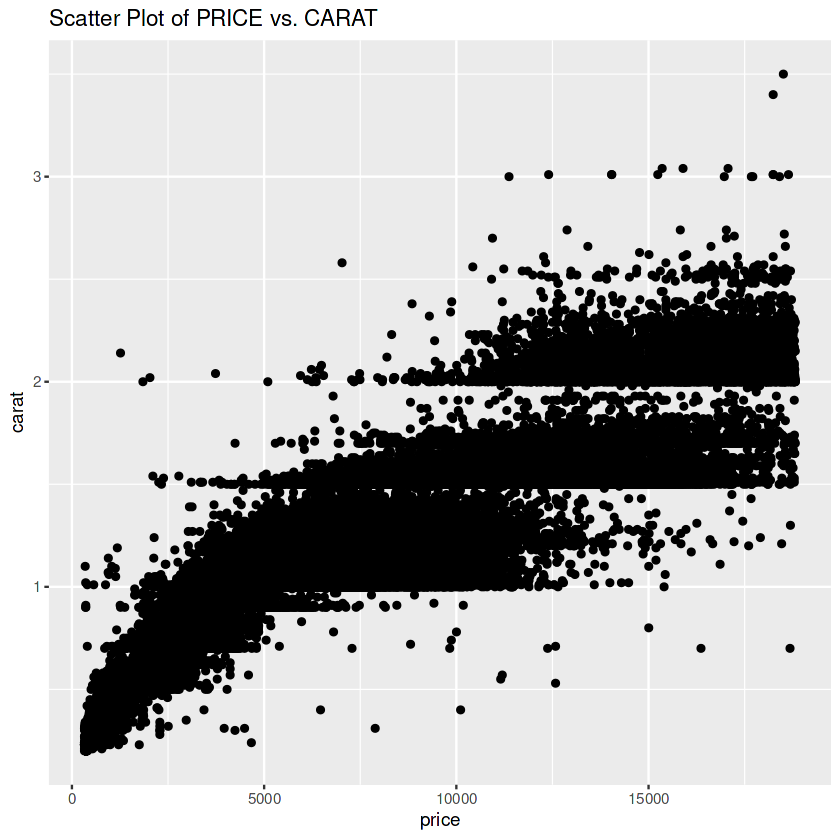

In [10]:
ggplot(dimond_data, aes(x = price , y = carat)) +
  geom_point() +
  labs(x = "price", y = "carat", title = "Scatter Plot of PRICE vs. CARAT")

# SCATTER PLOT TWO

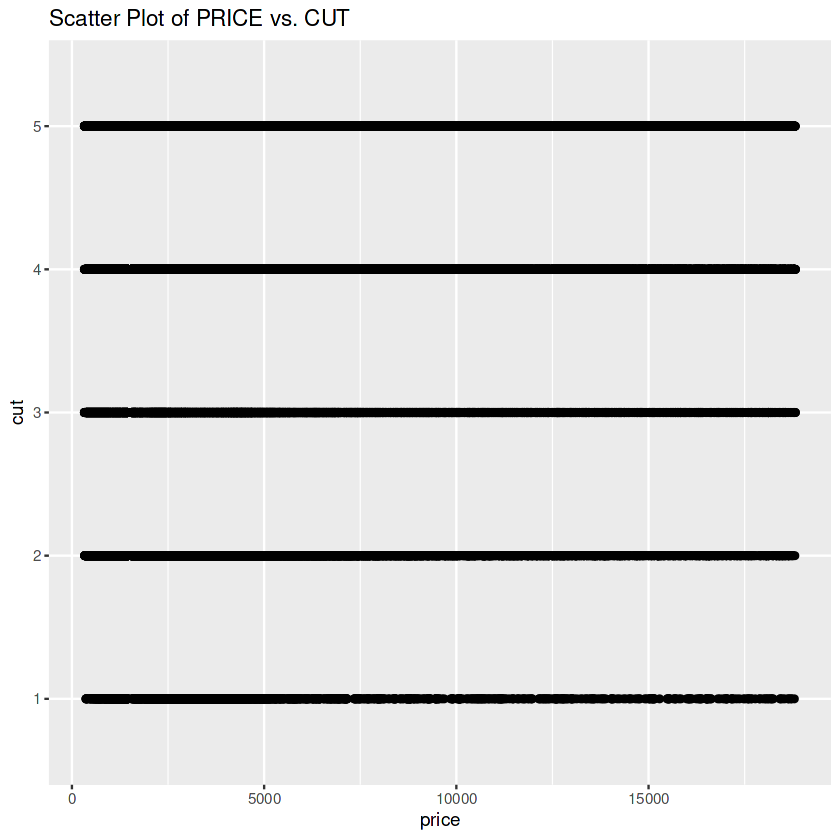

In [11]:
ggplot(dimond_data, aes(x = price , y = cut)) +
  geom_point() +
  labs(x = "price", y = "cut", title = "Scatter Plot of PRICE vs. CUT")

# SCATTER PLOT THREE

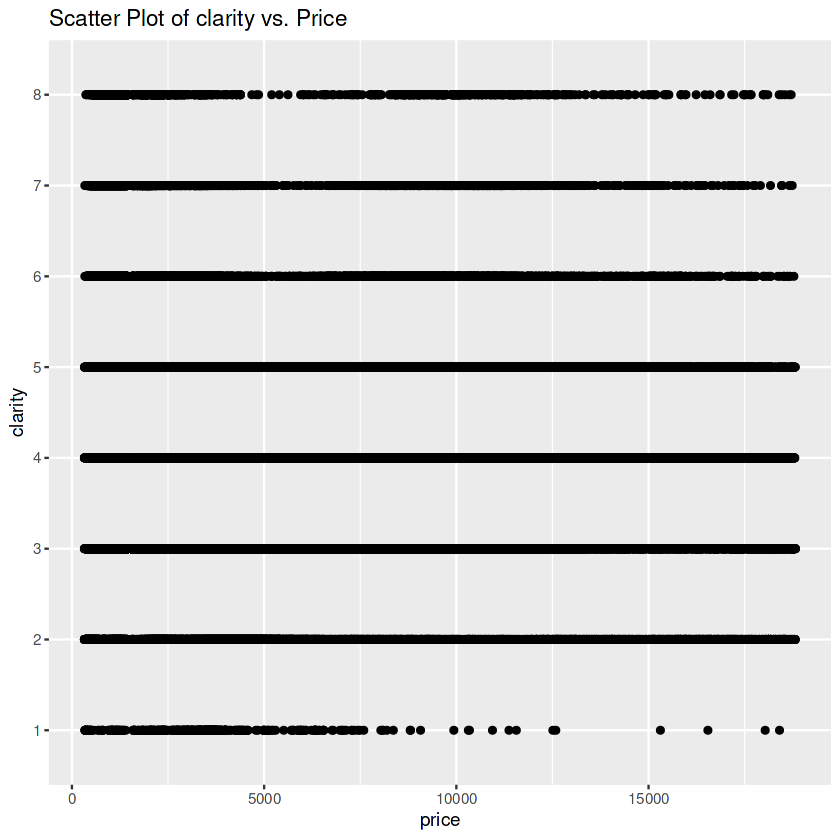

In [12]:
ggplot(dimond_data, aes(x = price , y = clarity)) +
  geom_point() +
  labs(x = "price", y = "clarity", title = "Scatter Plot of clarity vs. Price")

#SCATTER PLOT FOUR 

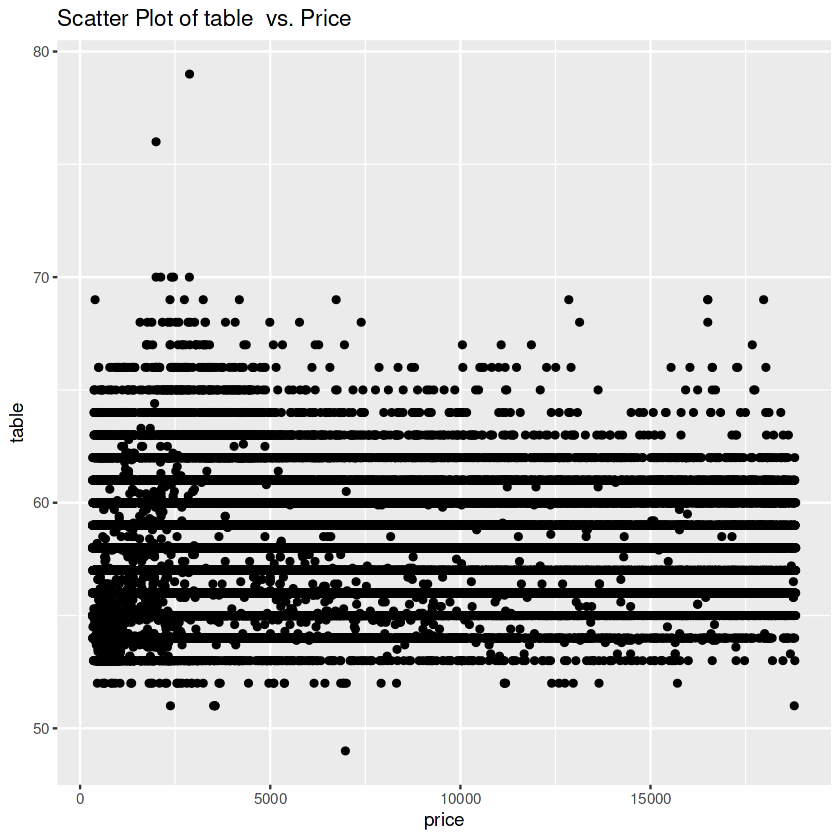

In [13]:
ggplot(dimond_data, aes(x = price , y = table    )) +
  geom_point() +
  labs(x = "price", y = "table    ", title = "Scatter Plot of table  vs. Price")

#SCATTER PLOT FIVE

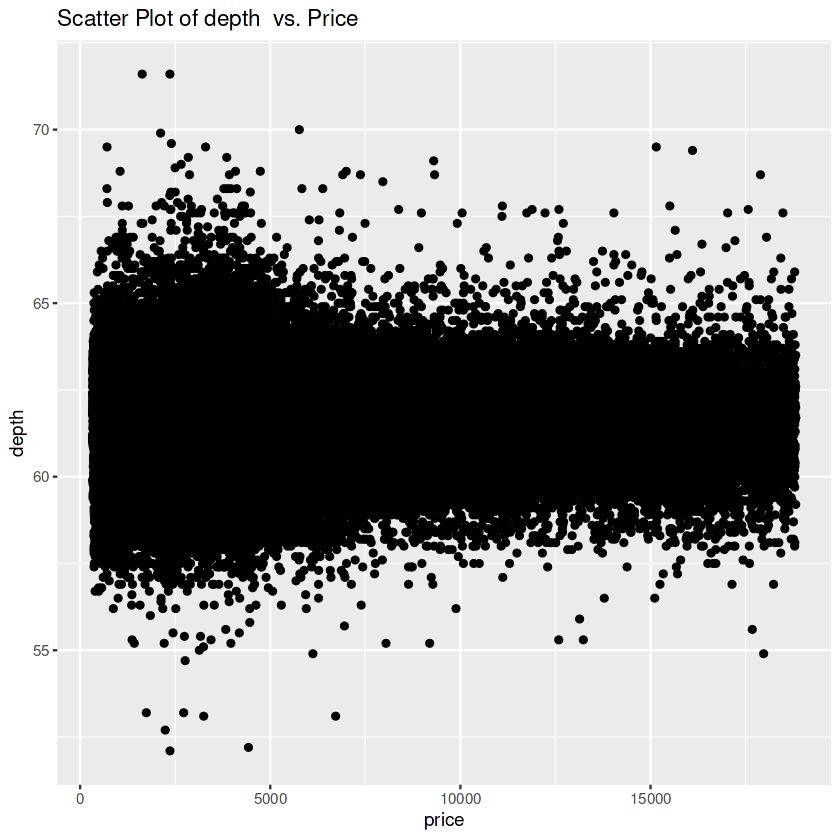

In [14]:
ggplot(dimond_data, aes(x = price , y = depth        )) +
  geom_point() +
  labs(x = "price", y = "depth        ", title = "Scatter Plot of depth  vs. Price")

#HEAT MAP

In [15]:

library(reshape2)
library(ggplot2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




NULL


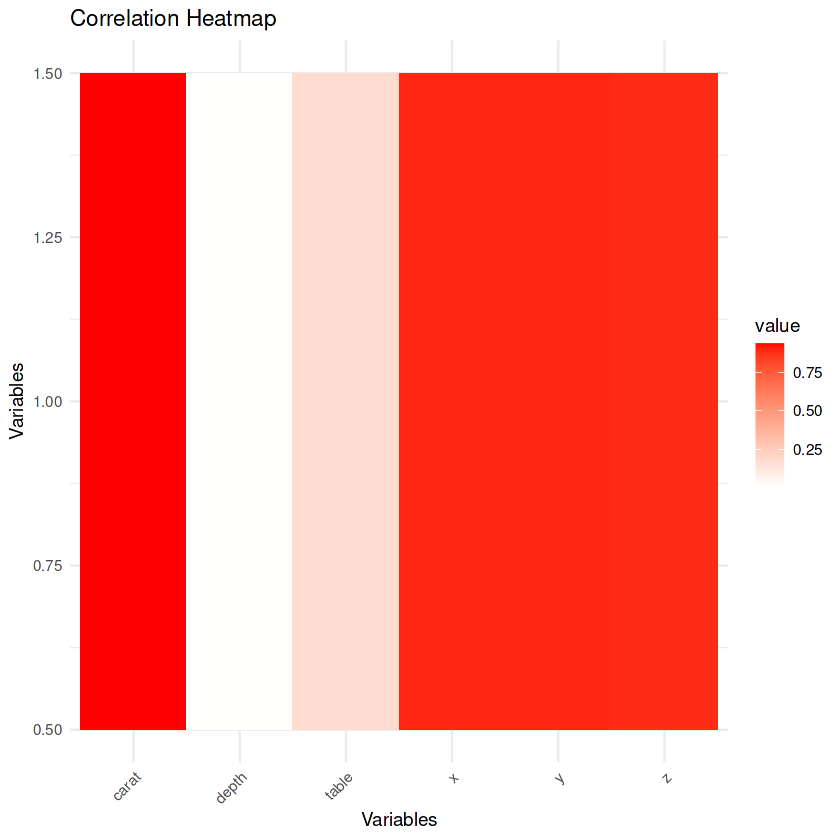

In [16]:
correlation_melted <- melt(correlation_matrix1)

ggplot(data = correlation_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme_minimal() +
  labs(title = "Correlation Heatmap", x = "Variables", y = "Variables") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
correlation_threshold <- 0.5
highly_correlated <- abs(correlation_matrix1) >= correlation_threshold
feature_names <- colnames(correlation_matrix1)
uncorrelated_features <- character(0)

uncorrelated_features <- unique(uncorrelated_features)
selected_features <- dimond_data[, c(uncorrelated_features, "price")]
print(names(selected_features))




#first model

In [17]:
model1 <- lm(price ~ ., data=dimond_data)
summary(model1)
# Make predictions
predictions <- predict(model1, newdata=dimond_data)

squared_differences <- (dimond_data$price - predictions)^2
mse <- mean(squared_differences)

# Print the MSE
cat("Mean Squared Error (MSE):", mse, "\n")
# RMSE
rmse <- sqrt(mean((dimond_data$price - predictions)^2))

  cat("Root Mean Squared Error (RMSE):", rmse, "\n")


Call:
lm(formula = price ~ ., data = dimond_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15025.0   -467.3   -137.8    338.9  16028.0 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.218e+04  2.426e+02   50.195  < 2e-16 ***
id           1.190e-05  3.866e-05    0.308    0.758    
carat        1.441e+04  2.501e+01  576.112  < 2e-16 ***
cut2         4.065e+02  2.335e+01   17.414  < 2e-16 ***
cut3         5.143e+02  2.266e+01   22.691  < 2e-16 ***
cut4         5.307e+02  2.260e+01   23.485  < 2e-16 ***
cut5         5.895e+02  2.308e+01   25.543  < 2e-16 ***
color6      -1.781e+02  7.921e+00  -22.488  < 2e-16 ***
color5      -2.520e+02  8.056e+00  -31.278  < 2e-16 ***
color4      -3.653e+02  7.823e+00  -46.694  < 2e-16 ***
color3      -8.730e+02  8.373e+00 -104.266  < 2e-16 ***
color2      -1.427e+03  9.781e+00 -145.842  < 2e-16 ***
color1      -2.317e+03  1.369e+01 -169.239  < 2e-16 ***
clarity2     1.605e+03  4.242e+01   37.827  < 

Mean Squared Error (MSE): 902992.6 
Root Mean Squared Error (RMSE): 950.2593 


#Secode model

In [18]:
model2 <- lm(price ~ carat + cut +  depth + table + x + y + z, 
            data=dimond_data)
summary(model2)
# Make predictions
predictions <- predict(model2, newdata=dimond_data)

squared_differences <- (dimond_data$price - predictions)^2
mse <- mean(squared_differences)

# Print the MSE
cat("Mean Squared Error (MSE):", mse, "\n")

rmse <- sqrt(mean((dimond_data$price - predictions)^2))

cat("Root Mean Squared Error (RMSE):", rmse, "\n")


Call:
lm(formula = price ~ carat + cut + depth + table + x + y + z, 
    data = dimond_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15242.4   -441.2    -35.4    273.0  15979.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19739.646    302.429  65.270  < 2e-16 ***
carat       13999.135     31.034 451.095  < 2e-16 ***
cut2          440.296     29.726  14.812  < 2e-16 ***
cut3          629.783     28.846  21.832  < 2e-16 ***
cut4          638.837     28.760  22.212  < 2e-16 ***
cut5          813.147     29.366  27.690  < 2e-16 ***
depth        -173.911      3.722 -46.726  < 2e-16 ***
table         -52.477      2.013 -26.066  < 2e-16 ***
x           -1966.573     64.164 -30.649  < 2e-16 ***
y            -387.063     63.463  -6.099 1.07e-09 ***
z             -94.260     37.178  -2.535   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1212 on 193562 degrees of freedom
Multiple R-s

Mean Squared Error (MSE): 1468177 
Root Mean Squared Error (RMSE): 1211.684 


#THIRD MODEL

In [19]:
model3 <- lm(price ~ carat + cut +  depth + table + x + y ,
            data=dimond_data)
summary(model3)
# Make predictions
predictions <- predict(model3, newdata=dimond_data)

squared_differences <- (dimond_data$price - predictions)^2
mse <- mean(squared_differences)

# Print the MSE
cat("Mean Squared Error (MSE):", mse, "\n")

rmse <- sqrt(mean((dimond_data$price - predictions)^2))


Call:
lm(formula = price ~ carat + cut + depth + table + x + y, data = dimond_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15244.4   -441.3    -35.5    273.3  15978.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20085.964    269.829  74.440  < 2e-16 ***
carat       13999.074     31.034 451.087  < 2e-16 ***
cut2          440.452     29.727  14.817  < 2e-16 ***
cut3          629.794     28.847  21.832  < 2e-16 ***
cut4          638.940     28.761  22.216  < 2e-16 ***
cut5          813.073     29.367  27.687  < 2e-16 ***
depth        -179.498      3.000 -59.840  < 2e-16 ***
table         -52.504      2.013 -26.079  < 2e-16 ***
x           -1999.477     62.839 -31.819  < 2e-16 ***
y            -412.311     62.678  -6.578 4.77e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1212 on 193563 degrees of freedom
Multiple R-squared:  0.9098,	Adjusted R-squared:  0.9098 
F-statistic: 2.16

Mean Squared Error (MSE): 1468226 


#fourth mode


In [20]:
model4 <- lm(price ~ carat + cut +  depth + table + x ,
            data=dimond_data)
summary(model4)
# Make predictions
predictions <- predict(model4, newdata=dimond_data)

squared_differences <- (dimond_data$price - predictions)^2
mse <- mean(squared_differences)

# Print the MSE
cat("Mean Squared Error (MSE):", mse, "\n")

rmse <- sqrt(mean((dimond_data$price - predictions)^2))

cat("Root Mean Squared Error (RMSE):", rmse, "\n")



Call:
lm(formula = price ~ carat + cut + depth + table + x, data = dimond_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15258.1   -443.5    -35.3    276.0  15979.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19940.460    268.950   74.14   <2e-16 ***
carat       13985.598     30.970  451.59   <2e-16 ***
cut2          419.861     29.565   14.20   <2e-16 ***
cut3          606.171     28.626   21.18   <2e-16 ***
cut4          631.981     28.744   21.99   <2e-16 ***
cut5          795.783     29.252   27.20   <2e-16 ***
depth        -177.832      2.989  -59.49   <2e-16 ***
table         -52.108      2.013  -25.89   <2e-16 ***
x           -2404.013     12.923 -186.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1212 on 193564 degrees of freedom
Multiple R-squared:  0.9098,	Adjusted R-squared:  0.9098 
F-statistic: 2.44e+05 on 8 and 193564 DF,  p-value: < 2.2e-16


Mean Squared Error (MSE): 1468554 
Root Mean Squared Error (RMSE): 1211.839 


# FIFTH MODEL

In [21]:
model5 <- lm(price ~ carat + cut +  depth + table  ,
            data=dimond_data)
summary(model5)
# Make predictions
predictions <- predict(model5, newdata=dimond_data)

squared_differences <- (dimond_data$price - predictions)^2
mse <- mean(squared_differences)

# Print the MSE
cat("Mean Squared Error (MSE):", mse, "\n")

rmse <- sqrt(mean((dimond_data$price - predictions)^2))

cat("Root Mean Squared Error (RMSE):", rmse, "\n")



Call:
lm(formula = price ~ carat + cut + depth + table, data = dimond_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13674.0   -791.7    -15.0    604.2  15620.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4747.560    278.212   17.07   <2e-16 ***
carat       8339.112      6.673 1249.76   <2e-16 ***
cut2         481.684     32.097   15.01   <2e-16 ***
cut3         759.290     31.066   24.44   <2e-16 ***
cut4         765.156     31.198   24.53   <2e-16 ***
cut5         952.473     31.746   30.00   <2e-16 ***
depth        -79.721      3.195  -24.95   <2e-16 ***
table        -57.177      2.185  -26.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1316 on 193565 degrees of freedom
Multiple R-squared:  0.8936,	Adjusted R-squared:  0.8936 
F-statistic: 2.323e+05 on 7 and 193565 DF,  p-value: < 2.2e-16


Mean Squared Error (MSE): 1731094 
Root Mean Squared Error (RMSE): 1315.71 


# SIXTH MODEL

In [22]:
model6 <- lm(price ~ carat + cut +  depth   ,
            data=dimond_data)
summary(model6)
# Make predictions
predictions <- predict(model6, newdata=dimond_data)

squared_differences <- (dimond_data$price - predictions)^2
mse <- mean(squared_differences)

# Print the MSE
cat("Mean Squared Error (MSE):", mse, "\n")

rmse <- sqrt(mean((dimond_data$price - predictions)^2))

cat("Root Mean Squared Error (RMSE):", rmse, "\n")



Call:
lm(formula = price ~ carat + cut + depth, data = dimond_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13810.7   -797.9    -14.2    605.7  15566.7 

Coefficients:
            Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -453.855    195.014   -2.327     0.02 *  
carat       8313.573      6.612 1257.261   <2e-16 ***
cut2         539.031     32.078   16.804   <2e-16 ***
cut3         866.247     30.851   28.079   <2e-16 ***
cut4         845.282     31.103   27.177   <2e-16 ***
cut5        1174.472     30.645   38.324   <2e-16 ***
depth        -50.627      3.000  -16.875   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1318 on 193566 degrees of freedom
Multiple R-squared:  0.8933,	Adjusted R-squared:  0.8933 
F-statistic: 2.7e+05 on 6 and 193566 DF,  p-value: < 2.2e-16


Mean Squared Error (MSE): 1737218 
Root Mean Squared Error (RMSE): 1318.036 


#PRIDICTING USING MODEL ONE 

In [23]:
test_data <- read.csv("/kaggle/input/ipba-17-regression-gemstone-non-graded/test.csv")


In [24]:
missing_count <- sum(is.na(test_data))
print(missing_count)


[1] 0


In [25]:
test_data$color = factor(test_data$color,levels = c('D','E','F','G','H','I','J'),labels = c(7,6,5,4,3,2,1))
test_data$cut = factor(test_data$cut,levels = c('Fair','Good','Very Good','Premium','Ideal'),labels = c(1,2,3,4,5))
test_data$clarity = factor(test_data$clarity,levels = c('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'),labels = c(1,2,3,4,5,6,7,8))

In [26]:
summary(test_data)


       id             carat        cut       color        clarity     
 Min.   :193573   Min.   :0.2000   1: 1307   7:16167   3      :35336  
 1st Qu.:225835   1st Qu.:0.4000   2: 7554   6:24086   4      :32201  
 Median :258098   Median :0.7000   3:25468   5:22767   5      :20519  
 Mean   :258098   Mean   :0.7893   4:33498   4:29561   2      :20167  
 3rd Qu.:290360   3rd Qu.:1.0300   5:61223   3:20576   6      :10317  
 Max.   :322622   Max.   :4.5000             2:11685   7      : 7327  
                                             1: 4208   (Other): 3183  
     depth           table             x                y         
 Min.   :53.20   Min.   :51.00   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:61.30   1st Qu.:56.00   1st Qu.: 4.700   1st Qu.: 4.710  
 Median :61.90   Median :57.00   Median : 5.700   Median : 5.720  
 Mean   :61.82   Mean   :57.24   Mean   : 5.712   Mean   : 5.716  
 3rd Qu.:62.40   3rd Qu.:58.00   3rd Qu.: 6.510   3rd Qu.: 6.510  
 Max.   :70.60   Max.   :70.00

In [27]:
predictions1 <- predict(model1, newdata=test_data)


In [28]:
head(predictions1)


1         2         3         4         5         6 
1130.1033 2297.8727 2259.3942 1325.1748 6778.4992  661.6298

In [29]:
  submission<- data.frame(test_data$id,predictions1)
colnames(submission)<- c('id','price')


In [30]:
head(submission)


,id,price
,<int>,<dbl>
1,193573,1130.1033
2,193574,2297.8727
3,193575,2259.3942
4,193576,1325.1748
5,193577,6778.4992
6,193578,661.6298


#EXPORT

In [31]:
write.csv(submission,"submission.csv",row.names=FALSE)